# Lab 5

# A
## 1
The convolution of F and W1 results in:
$$
\left(\begin{array}{cc} 
1 & 3 & 4 & 6 & 6 & 8 & 6 & 6 & 6 & 13 & 18 & 23 & 24 & 26 & 25 & 24 & 15 & 8
\end{array}\right)
$$

## 2
The convolution of F and W2 results in:
$$
\left(\begin{array}{cc} 
1 & 2 & 0 & 1 & 1 & 0 & -1 & -1 & 2 & 6 & 4 & 0 & 2 & 1 & -2 & -1 & -7 & -8
\end{array}\right)
$$

# B
### 1
The sobel filter can be seperated into two kernels:

$$
\left(\begin{array}{cc} 
1 & 0 & -1 \\
2 & 0 & -2 \\
1 & 0 & -1 
\end{array}\right)
=
\left(\begin{array}{cc} 
1 \\
2 \\
1
\end{array}\right)
\left(\begin{array}{cc} 
1 & 0 & -1 
\end{array}\right)
$$

### 2

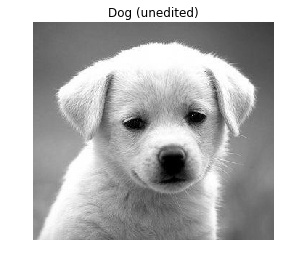

In [215]:
from scipy.ndimage.filters import uniform_filter, convolve
from scipy import ndimage
from time import time
import matplotlib.pyplot as plt
import numpy as np

dog = ndimage.imread("images/dog.jpg", mode="L", flatten=True)
plt.title("Dog (unedited)")
plt.axis('off')
plt.imshow(dog, cmap="gray")
plt.show()

We compared the execution time of two similar functions: convolve and uniform_filter. 

For each S (range 1 to 10), we repeated the experiment 5 times to get the average execution time of the function for different S.

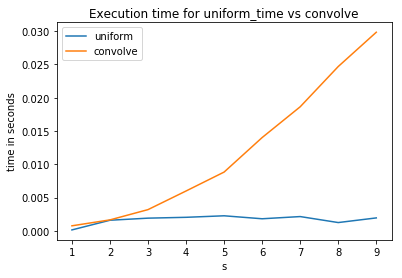

In [114]:
interval_s = np.arange(1, 10, 1)
repetition = 5

u_ys = []
# uniform
for s in interval_s:
    startTime = time()
    for i in range(0, repetition):
        uniform_filter(dog, s)
    elapsedTimeInSeconds = time()-startTime
    u_ys.append(elapsedTimeInSeconds / repetition)
    
c_ys = []
# convolve
for s in interval_s:
    startTime = time()
    for i in range(0, repetition):
        convolve(dog, np.ones((s,s))/(s**2))
    elapsedTimeInSeconds = time()-startTime
    c_ys.append(elapsedTimeInSeconds / repetition)

plt.title("Execution time for uniform_time vs convolve")
plt.plot(interval_s, u_ys, label="uniform")
plt.plot(interval_s, c_ys, label="convolve")
plt.legend()
plt.xlabel("s")
plt.ylabel("time in seconds")
plt.show()

Using the convolve function, you have to multiply your NxM matrix by a AxB matrix (NxMxAxB), in contrast to the uniform filter where you have yo multiply your NxM matrix by a Ax1 matrix and a 1xB (NxMx(A+B)), which has a more advantageous complexity.

# C
## 1

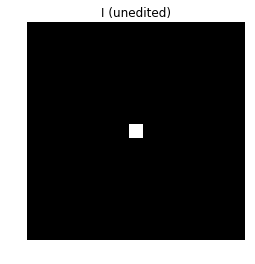

In [199]:
from scipy.ndimage.filters import laplace, sobel, prewitt, gaussian_laplace

I = np.zeros((15, 15))
I[7][7] = 1

plt.title("I (unedited)")
plt.axis('off')
plt.imshow(I, cmap="gray")
plt.show()

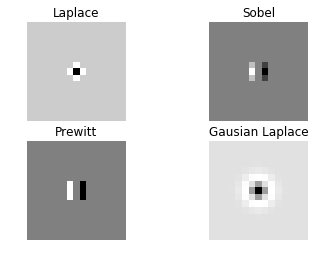

In [13]:
plt.subplot(2,2,1)
plt.imshow(laplace(I), cmap="gray")
plt.axis('off')
plt.title("Laplace")

plt.subplot(2,2,2)
plt.imshow(sobel(I), cmap="gray")
plt.axis('off')
plt.title("Sobel")

plt.subplot(2,2,3)
plt.imshow(prewitt(I), cmap="gray")
plt.axis('off')
plt.title("Prewitt")

plt.subplot(2,2,4)
plt.imshow(gaussian_laplace(I, 1), cmap="gray")
plt.axis('off')
plt.title("Gausian Laplace")

plt.show()

 - Laplace: Takes the sum of the second derivatives and calculates the sum of differences over the nearest neighbours of the central pixel.
 - Sobel: !!!!!!!

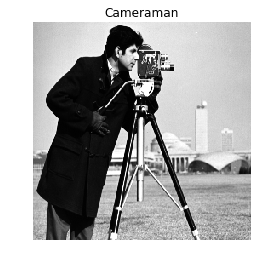

In [216]:
cameraman = ndimage.imread("images/cameraman.png", mode="L", flatten=True)

plt.axis('off')
plt.title("Cameraman")
plt.imshow(cameraman, cmap="gray")
plt.show()

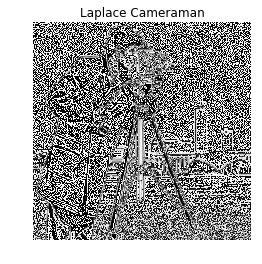

In [195]:
plt.axis('off')
plt.title("Laplace Cameraman")
plt.imshow(laplace(cameraman), cmap="gray")
plt.show()

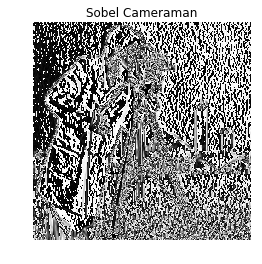

In [196]:
plt.axis('off')
plt.title("Sobel Cameraman")
plt.imshow(sobel(cameraman), cmap="gray")
plt.show()

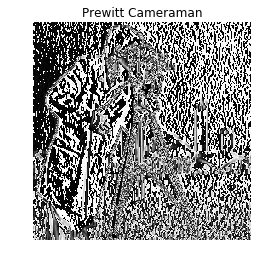

In [197]:
plt.axis('off')
plt.title("Prewitt Cameraman")
plt.imshow(prewitt(cameraman), cmap="gray")
plt.show()

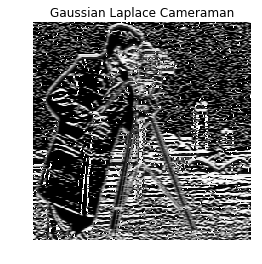

In [198]:
plt.axis('off')
plt.title("Gaussian Laplace Cameraman")
plt.imshow(gaussian_laplace(cameraman, 1), cmap="gray")
plt.show()

## 2

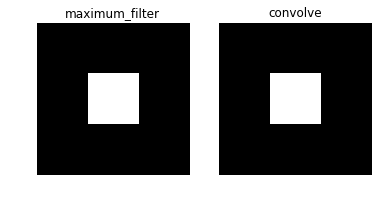

In [27]:
from scipy.ndimage.filters import maximum_filter

plt.subplot(1,2,1)
plt.title("maximum_filter")
plt.axis('off')
plt.imshow(maximum_filter(I,(5,5)), cmap="gray")

plt.subplot(1,2,2)
plt.title("convolve")
plt.axis('off')
plt.imshow(convolve(I, np.ones((5,5))), cmap="gray")

plt.show()

The maximum filter takes the maximum value of the neighbourhood. The convolve function takes the sum of the neighboorhood.

The result of these filter however look the same on our image I. This is due to the fact that black is represented as 0, and white as 255. Since there is only one white pixel, the white pixel will result in 255 for every neighbourhood it takes place in via the maximum_filter. The result of the convolve of any neighbourhood the white pixel is in will also be 255, because (0*X)+255=255.


# Lab 6

## 6.1, 6.2 , 6.3, 6.4

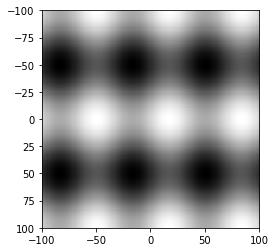

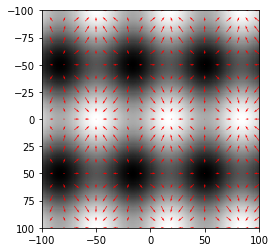

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

x = np.arange(-100,101); y = np.arange(-100,101);
X, Y = np.meshgrid(x,y)
A = 1; B = 2; V = 6*np.pi/201; W = 4*np.pi/201;
F = A*np.sin(V*X) + B*np.cos(W*Y)
plt.clf();
plt.imshow(F, cmap=plt.cm.gray, extent=(-100,100,100,-100));
plt.show()

#derivatives with respect to x or y; depending on the function
Fx = A * V * np.cos(V * X) 
Fy = -1 *(B) * W * np.sin(W * Y)

xx = np.arange(-100, 101, 10);
yy = np.arange(-100, 101, 10);
XX, YY = np.meshgrid(xx, yy);

FFx = Fx[::10, ::10]
FFy = Fy[::10, ::10]
plt.clf();
plt.imshow(F, cmap=plt.cm.gray, extent=(-100,100,100,-100), origin='upper');
plt.quiver( xx, yy, FFx, FFy, color='red', angles='xy' );
plt.show()

##6.4

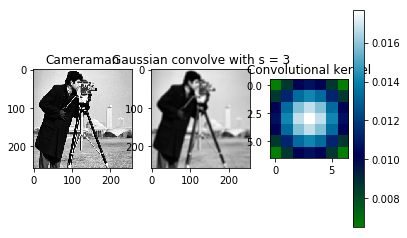

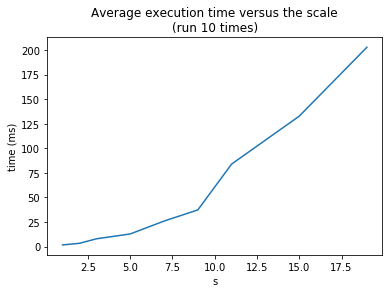

In [7]:
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def Gauss(s):
    """ This function returns the Gaussian convolution """
    x = np.arange(-s, s+1)
    y = np.arange(-s, s+1)
    Y, X = np.meshgrid(x, y)
    return (1/(2*math.pi*s**2) * np.exp(-(X**2+Y**2).astype(float)/(2*s**2)))


def run_gaussian_convolutions(F, s_values):
    """ This function calculates the Gaussian convolution for a given image F
    and given values of s in an array and returns an array with the execution
    times. """
    times = np.array([])
    for s in s_values:
        start = datetime.datetime.now()
        convolve(F, Gauss(s), mode='nearest')
        end = datetime.datetime.now()
        diff = (end - start).total_seconds()
        times = np.append(times, diff)
    return times


def avg_runnning(F, s_values, n):
    """ This function gets the average execution times for getting the Gaussian
    convolution for a given image F, an array of s values over n times and
    returns an array with the average times. """

    times = np.zeros(len(s_values))
    for i in range(1, n+1):
        times += run_gaussian_convolutions(F, s_values)/n
    return times * 1000


def gaussian_convolution():
    F = plt.imread('./images/cameraman.png')

    # Example of Gaussian convolution
    s = 3
    G = convolve(F, Gauss(s), mode='nearest')
    plt.subplot(1, 3, 1)
    plt.title('Cameraman')
    plt.imshow(F, cmap=plt.cm.gray)
    plt.subplot(1, 3, 2)
    plt.title('Gaussian convolve with s = {}'.format(s))
    plt.imshow(G, cmap=plt.cm.gray)
    plt.subplot(1, 3, 3)
    plt.title('Convolutional kernel')
    plt.imshow(Gauss(s), interpolation='nearest', cmap=plt.cm.ocean)
    plt.colorbar()
    plt.show()

    # Gaussian convolution function run 100 times for average execution time.
    n = 10
    s_values = np.array([1, 2, 3, 5, 7, 9, 11, 15, 19])
    times = avg_runnning(F, s_values, n)
    plt.clf()
    plt.title("Average execution time versus the scale\n(run {0} times)"
              .format(n))
    plt.xlabel("s")
    plt.ylabel("time (ms)")
    plt.plot(s_values, times)
    plt.show()
    
gaussian_convolution()

## 6.5
### 1

The gaussian function can be seperated by dimension:

$G^s(x,y) = G^s_1(x)G^s_1(y)$

The Gauss1(s) is the kernel for the x-dimension, and can be written as:

$G^s(x) = \frac{1}{\sqrt{2 \pi} \cdot s} e^{-\frac{x^2}{2s^2}}$

Thus Gauss1(s) returns the one dimensional convolution for scale s.

In [14]:
def Gauss1(s):
    x = np.arange(-s, s + 1)
    t = (1 / (np.sqrt(2 * np.pi) * s) * np.exp(-(x**2) / (2 * s**2)))
    return t

### 2

In [189]:
from scipy.ndimage.filters import convolve1d

def gc2d(F, s):
    ca1d = convolve1d(F, Gauss1(s), axis=-1, mode='nearest')
    return convolve1d(ca1d, Gauss1(s), axis=0, mode='nearest')

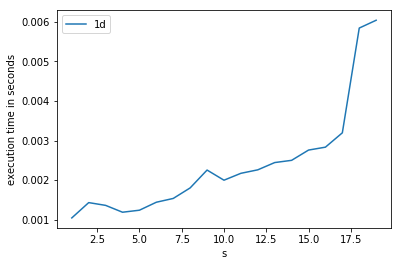

In [188]:
ss = np.arange(1, 20, 1)
s_ys = []
s_ys2 = []

repetition = 20

# 1d
for s in ss:
    startTime = time()    
    for i in range(0, repetition):        
        gc2d(cameraman, s) 
    elapsedTimeInSeconds = time()-startTime
    s_ys.append(elapsedTimeInSeconds / repetition)

# TODO: use marcus' gaus2d function here for comparison
# 2d
# for s in ss:
#     startTime = time()    
#     for i in range(0, repetition):        
#         gaus2d(cameraman, s) 
#     elapsedTimeInSeconds = time()-startTime
#     s_ys.append(elapsedTimeInSeconds / repetition)
    

plt.plot(ss, s_ys, label="1d")
# plt.plot(ss, s_ys2, label="2d")
plt.xlabel("s")
plt.ylabel("execution time in seconds")
plt.legend()
plt.show()

### 6.6

TODO: PROOF

$f(x) = \frac{1}{\sqrt{2 \pi} \cdot s} e^{-\frac{x^2}{2s^2}}$

$f'(x) = -x \cdot e^{\frac{-x^2}{2s^2}} / s^2)$ 

In [231]:
def gD(F, s, iorder, jorder):
    ns = s * 3.0
    x = np.arange(-ns, ns+1)

    f = (1 / (np.sqrt(2 * np.pi) * s)) * np.exp(-(x**2 / (2 * s**2)))
    ff = (-x * np.exp(-x**2 / (2 * s**2)) / (s**2)) * (1 / (np.sqrt(2 * np.pi) * s))
    fff = ((((x**2) - (s**2)) * np.exp(-((x**2) / (2 * (s**2)))) / (s**4)) *
           (1 / (np.sqrt(2 * np.pi) * s)))
    
    fs = [f, ff, fff]

    for i, t in enumerate([iorder, jorder]):
        F = convolve1d(F, fs[t], axis=i, mode='nearest')
    return F

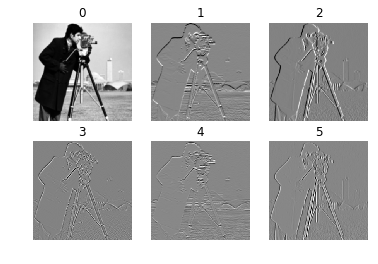

In [220]:
s = 1

c_00 = gD(cameraman, s, 0, 0)
c_10 = gD(cameraman, s, 1, 0)
c_01 = gD(cameraman, s, 0, 1)
c_11 = gD(cameraman, s, 1, 1)
c_20 = gD(cameraman, s, 2, 0)
c_02 = gD(cameraman, s, 0, 2)

cs = [c_00, c_10, c_01, c_11, c_20, c_02]

for i, c in enumerate(cs):
    plt.subplot(str(23) + str(i + 1))
    plt.title(i)
    plt.imshow(c, cmap="gray")
    plt.axis('off')

plt.show()

### 6.7

For Fx and Fy: A, B, V and W are given. We then create a meshgrid (swap the axes!), and we need to compute the derivatives manually:

$f(x) = Asin(Vx) \rightarrow f'(x) = A \cdot V \cdot sin(Vx)$

$f(y) = Bcos(Wx) \rightarrow f'(y) = B \cdot w \cdot -sin(Wy)$

In [224]:
xx = np.arange(-128, 128)
yy = np.arange(-128, 128)
# switched?
YY, XX = np.meshgrid(xx, yy)

# constante
A = 1; B = 2; V = 6*np.pi/201; W = 4*np.pi/201

# afgeleide
Fx = A * V * np.cos(V * XX)
Fy = B * W * -np.sin(W * YY)

# descrete aproach
dFx = gD(cameraman, 1, 1, 0)
dFy = gD(cameraman, 1, 0, 1)

The division of Fx by dFx should result in a homogeneous image (one color), since:

$c = \frac{Fx}{dFx}$

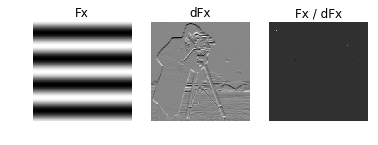

In [230]:
# X
plt.subplot(2,3,1)
plt.title("Fx")
plt.imshow(Fx, cmap="gray")
plt.axis('off')

plt.subplot(2,3,2)
plt.title("dFx")
plt.imshow(dFx, cmap="gray")
plt.axis('off')

plt.subplot(2,3,3)
plt.title("Fx / dFx")
plt.imshow(Fx/dFx, cmap="gray")
plt.axis('off')

plt.show()

The Y part handles the vertical derivatives. Once again the result should be a homogenous image:

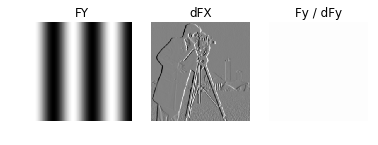

In [229]:
# Y
plt.subplot(2,3,4)
plt.title("FY")
plt.imshow(Fy, cmap="gray")
plt.axis('off')

plt.subplot(2,3,5)
plt.title("dFX")
plt.imshow(dFy, cmap="gray")
plt.axis('off')

plt.subplot(2,3,6)
plt.title("Fy / dFy")
plt.imshow(Fy / dFy, cmap="gray")
plt.axis('off')

plt.show()